In [1]:
%matplotlib inline

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('cosTop3FromTo.csv')

In [42]:
label_knn = pd.read_csv('KNN_result.csv')

In [43]:
label_knn

,PANEL_ID,APP_CATEGORY,APP_USE_TME,CATEGORY_CODE,Area_Name2,PAY_CNT,PAY_MEAN_AMOUNT,gender,age,loctown,...,education,job,family_cnt,has_baby,has_student,has_silver,ann_income,home_cat,home_pay,KNN_LABEL
0,A0000910,LIFESTYLE,932016,701,화성시,38,98782,1,5,1,...,4,6,5,0,0,0,4,2,1,0
1,A0001778,SOCIAL,185520,501,강동구,278,271246,2,4,1,...,4,997,4,0,0,0,4,2,1,0
2,A0005079,GAME,270570,401,강서구,23,20009,1,5,1,...,6,5,1,0,0,0,6,5,1,2
3,A0005444,EDUCATION,441035,502,동대문구,237,195353,2,4,1,...,2,11,4,0,0,0,5,2,1,0
4,A0009694,ENTERTAINMENT,539364,201,강서구,287,71854,2,4,1,...,4,11,4,0,0,0,4,2,2,0
5,H0000102,SOCIAL,113310,1799,송파구,72,103809,2,2,1,...,2,8,3,0,0,0,4,5,2,3
6,H0000408,EDUCATION,206050,1799,의왕시,3,37133,1,2,1,...,3,12,4,0,0,0,3,2,1,3
7,H0000522,LIFESTYLE,93952,101,수원시영통구,130,202345,1,3,1,...,6,7,5,0,0,0,6,1,1,3
8,H0000617,EDUCATION,537055,501,용인시수지구,290,960340,2,3,1,...,4,11,2,0,0,0,4,2,1,0
9,H0001082,SOCIAL,132152,101,수원시영통구,18,11675,2,2,1,...,4,13,5,0,0,1,3,2,1,3


In [46]:
label_knn['KNN_LABEL']

0       0
1       0
2       2
3       0
4       0
5       3
6       3
7       3
8       0
9       3
10      3
11      3
12      3
13      0
14      0
15      3
16      3
17      2
18      0
19      3
20      1
21      3
22      0
23      3
24      1
25      0
26      3
27      2
28      1
29      0
       ..
7637    0
7638    2
7639    3
7640    0
7641    0
7642    2
7643    0
7644    3
7645    3
7646    1
7647    2
7648    1
7649    2
7650    1
7651    3
7652    2
7653    1
7654    2
7655    2
7656    2
7657    0
7658    0
7659    2
7660    3
7661    2
7662    2
7663    1
7664    0
7665    0
7666    0
Name: KNN_LABEL, Length: 7667, dtype: int64

In [8]:
label = pd.read_csv(r'C:\Users\ahn92\Downloads\churn_label.csv')

In [26]:
label['PANEL_ID'][label['is_churn']==1]

7       H0000522
16      H0002978
38      H0011615
46      H0015771
49      H0017030
57      H0018903
63      H0021265
70      H0022973
72      H0023486
103     H0036782
108     H0039312
109     H0039732
116     H0041707
121     H0042797
124     H0043823
136     H0046643
147     H0048885
153     H0050818
155     H0051282
168     H0055516
170     H0056267
179     H0057863
192     H0063273
201     H0065985
203     H0066533
219     H0073805
227     H0075647
235     H0076516
238     H0076953
240     H0077622
          ...   
7384    P0298123
7404    P0298623
7431    P0299754
7455    P0300539
7460    P0300630
7464    P0300771
7468    P0300944
7480    P0301427
7485    P0301716
7488    P0301823
7503    P0302262
7519    P0303353
7543    P0304579
7548    P0305056
7551    P0305256
7556    P0305484
7577    P0306379
7578    P0306510
7580    P0306698
7581    P0306828
7604    P0308030
7623    P0308914
7626    P0309051
7629    P0309185
7633    P0309645
7635    P0309686
7637    P0309783
7638    P03098

In [4]:
data.head()

,from,to
0,A0000910,P0127220
1,A0000910,H0020657
2,A0000910,H0112559
3,A0001778,I0913778
4,A0001778,P0203884


In [5]:
graph = nx.Graph()

In [6]:
for i,j in zip(data['from'],data['to']):
    graph.add_edge(i,j)

In [ ]:
label['PANEL_ID'][label['is_churn']==1]

In [8]:
graph

In [28]:
for i in label['PANEL_ID'][label['is_churn']==1]:
    graph.add_edge('CHURN',i)

In [29]:
node2vec = Node2Vec(graph, dimensions=20, walk_length=16, num_walks=100, workers=4)

Computing transition probabilities: 100%|████████████████████████████████████████| 7668/7668 [00:05<00:00, 1341.60it/s]


In [30]:
model = node2vec.fit(window=10, min_count=1)

In [31]:
model.wv.vocab

{'P0090279': <gensim.models.keyedvectors.Vocab at 0x2e913833ac8>,
 'P0289086': <gensim.models.keyedvectors.Vocab at 0x2e911a4f518>,
 'P0308466': <gensim.models.keyedvectors.Vocab at 0x2e911a4fe80>,
 'P0248365': <gensim.models.keyedvectors.Vocab at 0x2e911a4fb00>,
 'P0275115': <gensim.models.keyedvectors.Vocab at 0x2e911a4fba8>,
 'H0030359': <gensim.models.keyedvectors.Vocab at 0x2e99be9dd68>,
 'H0196406': <gensim.models.keyedvectors.Vocab at 0x2e99be9dda0>,
 'H0070752': <gensim.models.keyedvectors.Vocab at 0x2e99be9ddd8>,
 'P0093985': <gensim.models.keyedvectors.Vocab at 0x2e99be9de10>,
 'H0161509': <gensim.models.keyedvectors.Vocab at 0x2e99be9de48>,
 'H0210007': <gensim.models.keyedvectors.Vocab at 0x2e99be9de80>,
 'P0149251': <gensim.models.keyedvectors.Vocab at 0x2e99be9deb8>,
 'P0219652': <gensim.models.keyedvectors.Vocab at 0x2e99be9def0>,
 'I0836764': <gensim.models.keyedvectors.Vocab at 0x2e99be9df28>,
 'P0294226': <gensim.models.keyedvectors.Vocab at 0x2e99be9df60>,
 'I0695221

In [32]:
for node, _ in model.most_similar('P0294908'):
    print(node)

P0111289
P0285286
P0242866
I0752627
P0135775
P0115935
P0214614
P0110186
P0169672
P0241413


In [33]:
panel_nodes = [x for x in model.wv.vocab if len(x) > 3]

In [34]:
panel_nodes

['P0090279',
 'P0289086',
 'P0308466',
 'P0248365',
 'P0275115',
 'H0030359',
 'H0196406',
 'H0070752',
 'P0093985',
 'H0161509',
 'H0210007',
 'P0149251',
 'P0219652',
 'I0836764',
 'P0294226',
 'I0695221',
 'P0276057',
 'H0205464',
 'H0212949',
 'P0260992',
 'P0236521',
 'H0140204',
 'CHURN',
 'P0114872',
 'P0251835',
 'P0150913',
 'H0198308',
 'P0031313',
 'I0505706',
 'P0159275',
 'H0109774',
 'P0104449',
 'M0175200',
 'P0205250',
 'I0902328',
 'H0199833',
 'I0176568',
 'H0026352',
 'H0195127',
 'P0289898',
 'P0287119',
 'H0080002',
 'P0266875',
 'P0282613',
 'P0234656',
 'P0284281',
 'I0049112',
 'P0278202',
 'P0199584',
 'H0150297',
 'P0172832',
 'P0287807',
 'S0003608',
 'P0044280',
 'H0195542',
 'M0136720',
 'M0151156',
 'P0145484',
 'P0169256',
 'P0251303',
 'P0278606',
 'I0141261',
 'P0298980',
 'I0724791',
 'P0263451',
 'H0203541',
 'H0158523',
 'H0184281',
 'P0294607',
 'P0306958',
 'P0280219',
 'I0533810',
 'P0129740',
 'P0053130',
 'H0148046',
 'P0239428',
 'I0598132',
 '

In [35]:
embeddings = np.array([model.wv[x] for x in panel_nodes])

In [45]:
embeddings.shape

(7668, 20)

In [36]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [37]:
embeddings_2d

array([[-48.994473 ,  -4.610616 ],
       [-49.817436 ,  -4.1937294],
       [-50.12357  ,  -3.9032338],
       ...,
       [ 18.08229  ,  -1.5062634],
       [ 18.126566 ,  -1.4403092],
       [ 37.32147  , -86.137024 ]], dtype=float32)

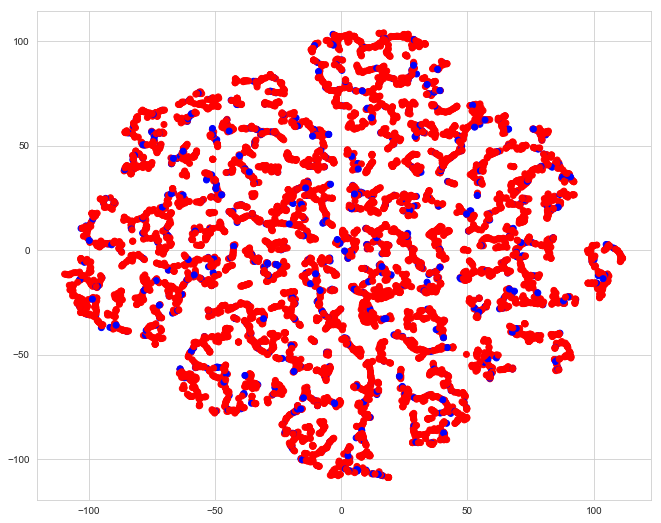

In [40]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=color)

In [39]:
color = label['is_churn'].map(lambda x: setcol(x))
#color =label_knn['KNN_LABEL'].map(lambda x: setcol(x))

In [21]:
def setcol(x):
    if x==0:
        return('r')
    elif x==1:
        return('b')
    elif x==2:
        return('g')
    elif x==3:
        return('teal')
    else:
        return('gainsboro')

In [38]:
label_knn.shape

(7667, 21)

In [ ]:
label_knn.groupby()